## Data Source 
https://www.kaggle.com/c/titanic/data

## Variables 

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Size

Less then 5 MBs.

## Downloading Data 

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import notebook_utilitis as nu

# nu.set_dir_to_root()

In [2]:
import get_data as gd

In [3]:
gd.download_titanic_data_from_kaggle()

Dataset already downloaded at /data/raw


In [4]:
gd.unzip_data()

Data is already unziped at /data/raw


In [5]:
import os
os.getcwd()

'C:\\Users\\malik\\Documents\\GitHub\\titanic-kaggle'

## View the structure of the data

In [6]:
raw_data = gd.load_raw_data()
raw_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
raw_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sdycoff, Mr. Todor",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Few variables are objects. I will take care of them in data preparation phase. 

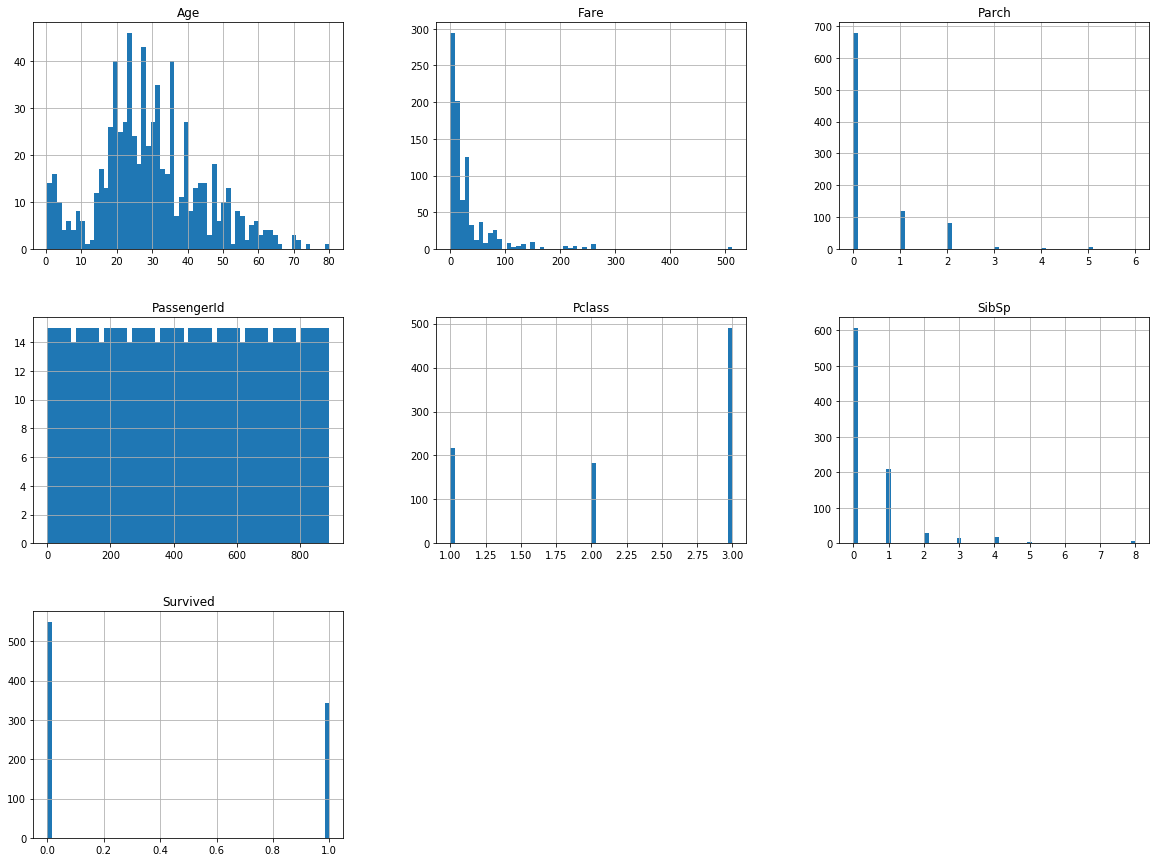

Saving figure Histogrm


<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 

raw_data.hist(bins = 60, figsize=(20,15))
plt.show()
nu.save_fig('Histogrm')

- Checking the male and female ratio:

In [10]:
raw_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

It turned out that males are more in number as compared to females. 

- Checking Various age groups

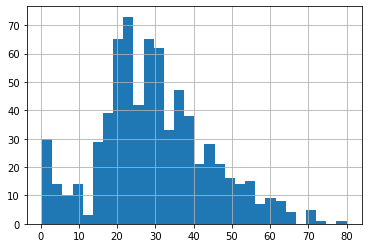

In [11]:
raw_data['Age'].hist(bins=30)

Larger number of people from the young and middle ages ranging from 15 to 40 where on-board. 

## Stratified Sampling

Different proportion of age groups can make sample biased as some age groups like children and Seniors may have high precedence to get a life boat.

Same goes for Sex. 

Hence, using stratified sampling technique to balance the proportion in training set. 

Age have missing value, so stratified sample cant be draw_datan on the base of Age. 
Therefore, proceeding with Sex variable.


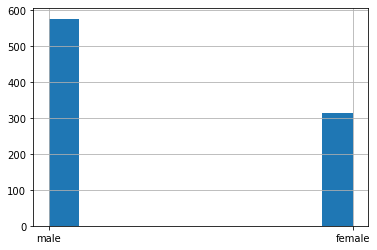

In [12]:
raw_data['Sex'].hist()

Making 20% Stratified Split based on Sex category

In [13]:
gd.stratified_split_data(raw_data,"Sex")

Saved at C:\Users\malik\Documents\GitHub\titanic-kaggle\data/intermi
